### Part I
### **<u>Objective</u>**:

Read and observe Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head(20)

head_data = df.head()

with open('df_head_output.txt', 'w') as file:
    file.write(head_data.to_string())

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
## No missing values
missing_val = df.isnull().sum()
print(missing_val)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [6]:
for col in df.columns:
        print(f"{col} unique values:\n{df[col].unique()}\n")

class unique values:
['p' 'e']

cap-shape unique values:
['x' 'b' 's' 'f' 'k' 'c']

cap-surface unique values:
['s' 'y' 'f' 'g']

cap-color unique values:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises unique values:
['t' 'f']

odor unique values:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment unique values:
['f' 'a']

gill-spacing unique values:
['c' 'w']

gill-size unique values:
['n' 'b']

gill-color unique values:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape unique values:
['e' 't']

stalk-root unique values:
['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring unique values:
['s' 'f' 'k' 'y']

stalk-surface-below-ring unique values:
['s' 'f' 'y' 'k']

stalk-color-above-ring unique values:
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring unique values:
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type unique values:
['p']

veil-color unique values:
['w' 'n' 'o' 'y']

ring-number unique values:
['o' 't' 'n']

ring-type unique values:
['p' 'e' 'l'

In [7]:
invalid = ['?']
invalid_entries = df[df['stalk-root'].isin(invalid)]
print(invalid_entries['stalk-root'].value_counts())

stalk-root
?    2480
Name: count, dtype: int64


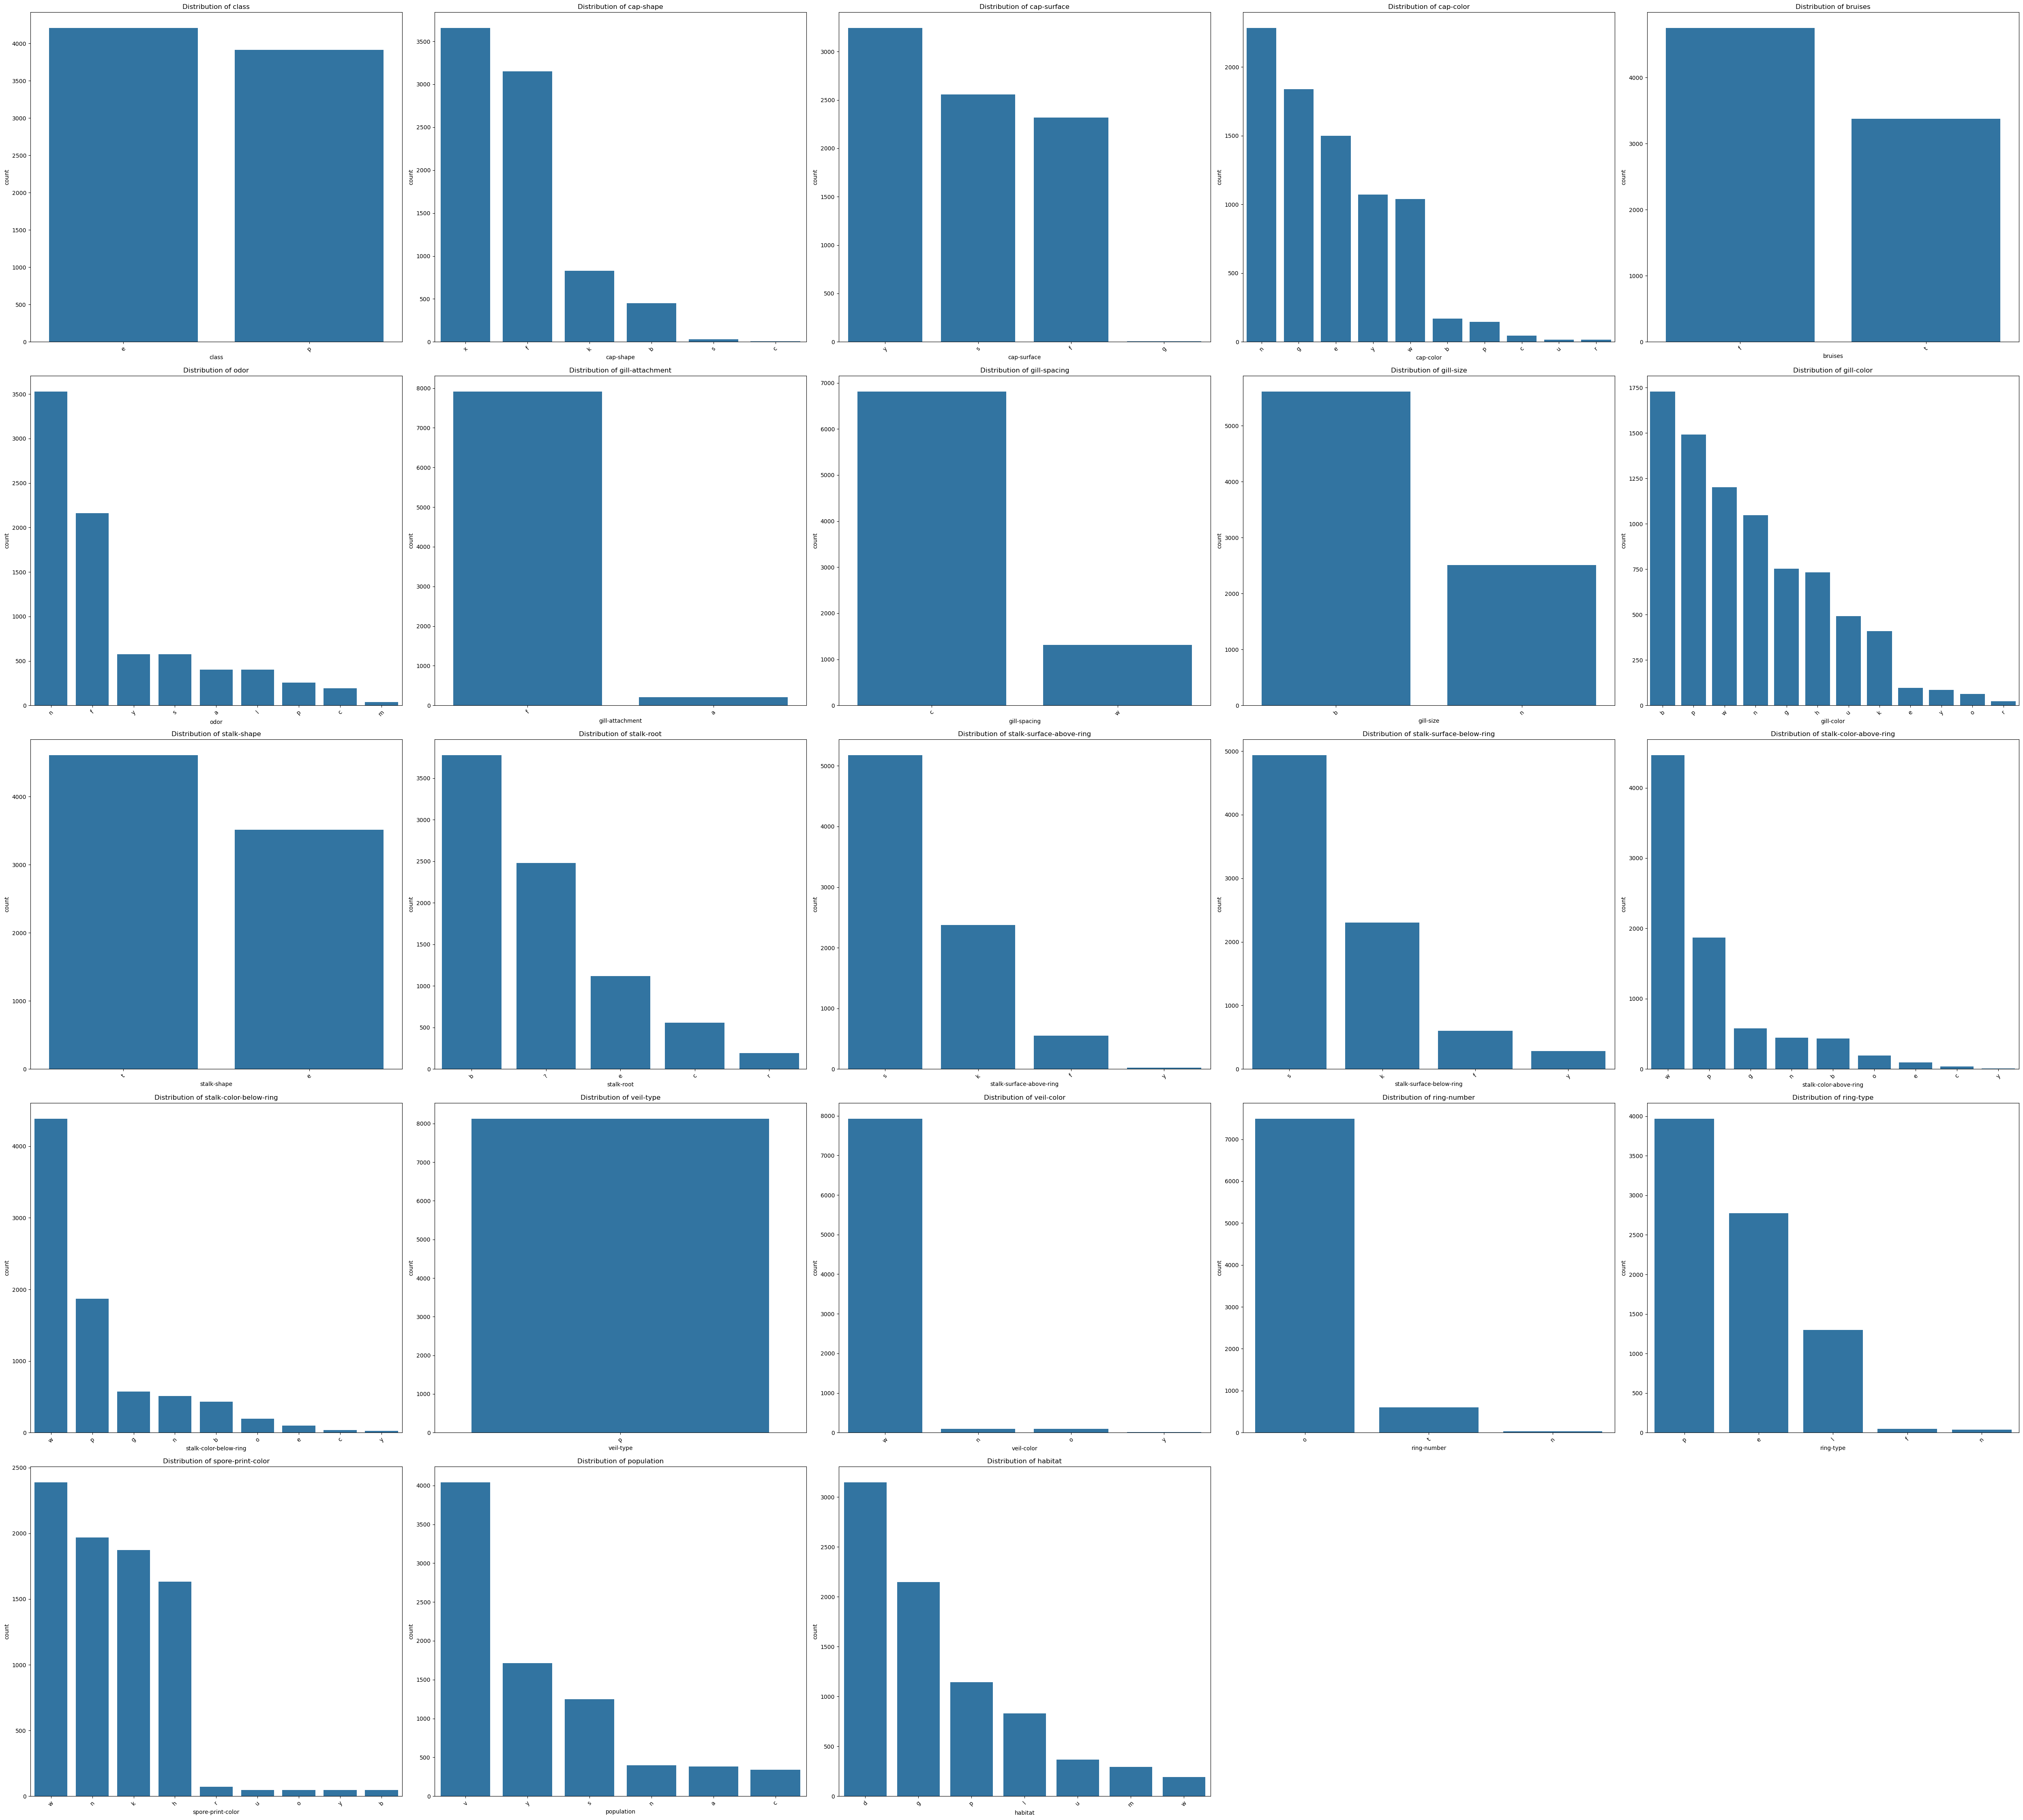

In [8]:
import math
object_columns = df.select_dtypes(include='object').columns
n_cols = 5
n_rows = math.ceil(len(object_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 9 * n_rows))
axes = axes.flatten()  

for ax, col in zip(axes, object_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.tick_params(axis='x', rotation=45)

# Turn off unused subplots if any
for i in range(len(object_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()